In [1]:
# data source https://www.kaggle.com/datasets/kishanyadav/inshort-news

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# collect full paths to all data files
files_paths = Path("news/").glob("inshort_news_data-*.csv")

# list for DataFrames for each CSV file
frames = []

# read all CSV files
for file_path in files_paths:
    frames.append(pd.read_csv(file_path, index_col="Unnamed: 0"))

# concat all DFs, make unified index column for whole DF, drop index column from previous step
df = pd.concat(frames).reset_index().drop(columns="index")
df

,news_headline,news_article,news_category
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...
12115,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
12116,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
12117,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
12118,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


In [4]:
# what classes are there
df.news_category.unique()

array(['technology', 'sports', 'world', 'politics', 'entertainment',
       'automobile', 'science'], dtype=object)

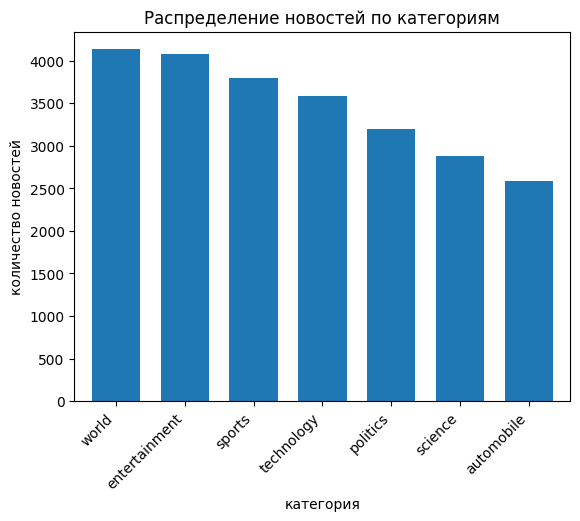

In [23]:
df["news_category"].value_counts().plot(kind="bar", width=0.7)
plt.title("Распределение новостей по категориям")
plt.xlabel("категория")
plt.ylabel("количество новостей")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

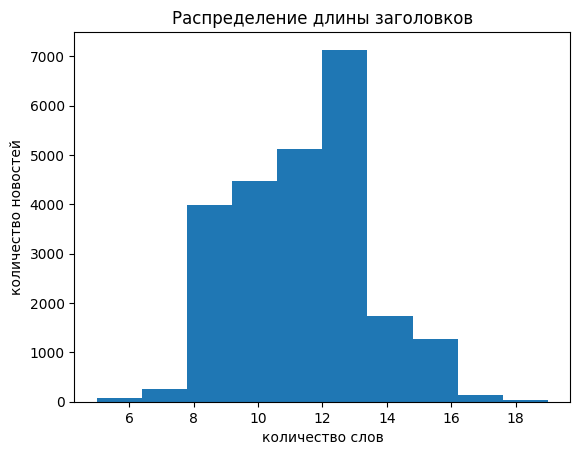

In [26]:
df.apply(lambda x: len(x["news_headline"].split()), axis=1).plot(kind="hist")
plt.title("Распределение длины заголовков")
plt.xlabel("количество слов")
plt.ylabel("количество новостей")
plt.show()

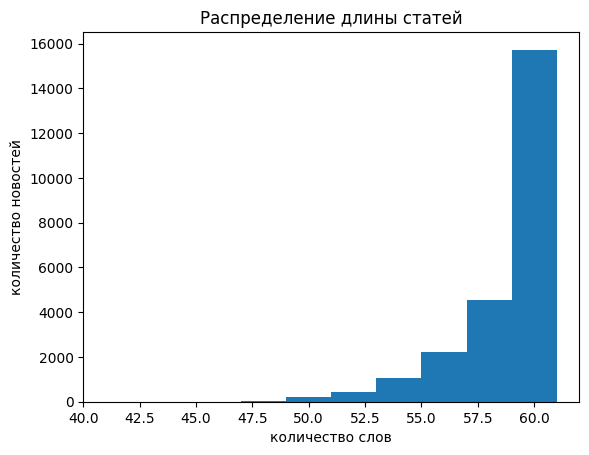

In [27]:
df.apply(lambda x: len(x["news_article"].split()), axis=1).plot(kind="hist")
plt.title("Распределение длины статей")
plt.xlabel("количество слов")
plt.ylabel("количество новостей")
plt.show()

In [64]:
df.to_csv("news/data.csv")